## DAND Project1 Investigate a dataset-titanic

https://seaborn.pydata.org/tutorial/categorical.html
<br />Plotting with categorical data

https://seaborn.pydata.org/tutorial/distributions.html
<br />Visualizing distributions

https://seaborn.pydata.org/tutorial/regression.html
<br />Exploring linear relationships

https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.h_7QXZk
<br />Pandas Cheat Sheet: Data Wrangling in Python

https://pandas.pydata.org/pandas-docs/stable/missing_data.html
<br />Working with missing data

http://www.datapine.com/blog/data-analysis-questions/
<br />Your Data Won’t Speak Unless You Ask It The Right Data Analysis Questions

http://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/
<br />TYPES OF STATISTICAL DATA: NUMERICAL, CATEGORICAL, AND ORDINAL

http://www.statisticshowto.com/what-is-a-contingency-table/
<br />Contingency Table

https://en.wikipedia.org/wiki/Contingency_table
<br />Contingency table

https://buckwoody.wordpress.com/2015/12/30/the-hardest-thing-in-data-science/
<br />The Hardest Thing In Data Science

https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1
<br />Methods for handling missing values

http://www.titanicfacts.net/titanic-survivors.html
<br />Titanic Survivors

## 1. Import things

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from fancyimpute import KNN

In [2]:
# this line cannot fill string value, so maybe could try to label encode the cabin and embarked
# data_imputed = KNN(k=3).complete(data)

## Questions:

>#### Q1: How many people survived and what the percentage of surviving?
>#### Q2: How many people in each class?
>#### Q3: Compare survival chance among Pclasses?
>#### Q4: Compare survival chance between male and female passangers?
>#### Q5: Compare survival chance between male and female passangers in first class?
>#### Q6: is there a Jack or Rose in our dataset?

## 2. Data Wrangling Phase

In [3]:
data = pd.read_csv('titanic-data.csv')

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Clean data

In [5]:
data.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


<b>So we can see there are missing values in Age, Cabin and Embarked</b>

In [6]:
aa = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
print(aa.index)

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')


In [7]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 2.1 clean age
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# use median value of age to fill the missing data
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 2.2 clean cabin
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# fill the null value in cabin with 'unknown'
data['Cabin'] = data['Cabin'].fillna('Unknown')


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 2.3 clean embarked
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# fillna with 'unknown' as well
data['Embarked'] = data['Embarked'].fillna('Unknown')

In [8]:
data.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,891,891,891,891,891,891,891,891,891,891,891,891


## 3. Exploration Phase

### 3.1 Single Variable Analysis

Died        549
Survived    342
Name: Survived, dtype: int64

The surviving rate is 0.383838383838


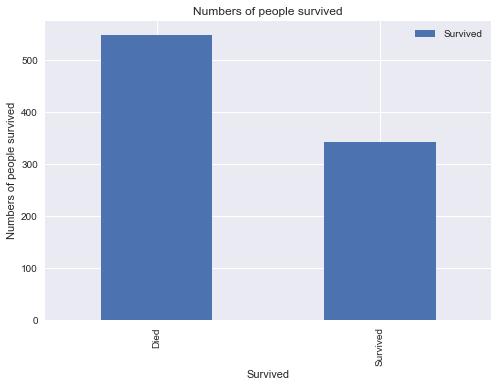

In [29]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.1 Survived
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# replace 0 and 1 with strings to make it easy to understand
data['Survived'].replace({0: 'Died', 1: 'Survived'}, inplace=True)
data['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Numbers of people survived')
plt.legend()
plt.title('Numbers of people survived')

print(data['Survived'].value_counts())
survived = data.query(''' Survived == 'Survived' ''')

num_of_survived = survived.shape[0]
survived_rate = 1.0 * num_of_survived / data.shape[0]
print('\nThe surviving rate is {}'.format(survived_rate))


https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
<br />pie chart reference---matplotlib

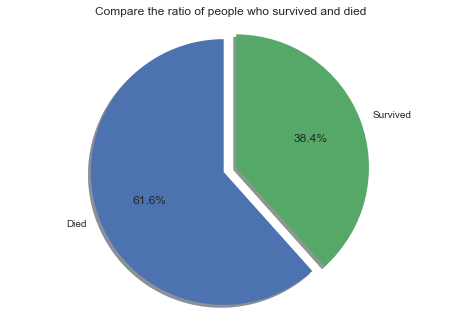

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Died', 'Survived'
sizes = [549, 342]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Compare the ratio of people who survived and died')

plt.show()

<b>Q1: How many people survived and what the percentage of surviving?</b>
<br /><b>A1: 342 people were survived, and surviving rate is about 38%</b>

3    491
1    216
2    184
Name: Pclass, dtype: int64


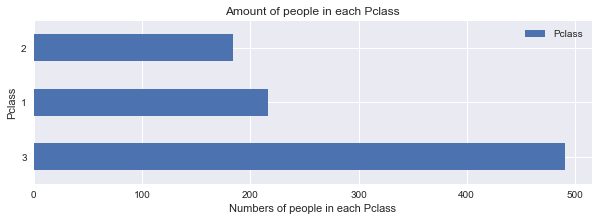

In [30]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.2 Pclass
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# print(data['Pclass'].describe())
print(data['Pclass'].value_counts())
# set the figure size
plt.figure(figsize=(10,3))
# plot
data['Pclass'].value_counts().plot(kind='barh')

plt.xlabel('Numbers of people in each Pclass')
plt.ylabel('Pclass')
plt.legend()
plt.title('Amount of people in each Pclass')

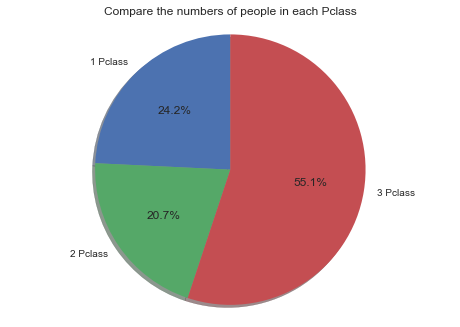

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1 Pclass', '2 Pclass', '3 Pclass'
sizes = [216, 184, 491]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Compare the numbers of people in each Pclass')

plt.show()

#### Have a look at number of people in each Pclass.

<b>Q2: How many people in each class?</b>
<br /><b>A2: First class: 216; Second class: 184; Third class: 491
<br />The amount of people in 3rd class is more than the number in first two combined</b>

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
male      577
female    314
Name: Sex, dtype: int64


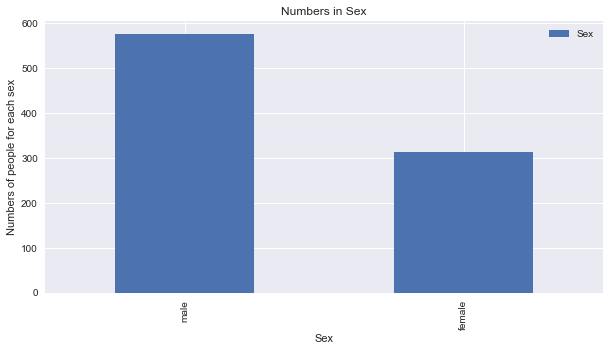

In [13]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.3 Sex
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
print(data['Sex'].describe())
# set the figure size
plt.figure(figsize=(10,5))
# plot
data['Sex'].value_counts().plot(kind='bar')
# letters
plt.xlabel('Sex')
plt.ylabel('Numbers of people for each sex')
plt.legend()
plt.title('Numbers in Sex')

print(data['Sex'].value_counts())


#### Have a look at the number of people for each sex

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


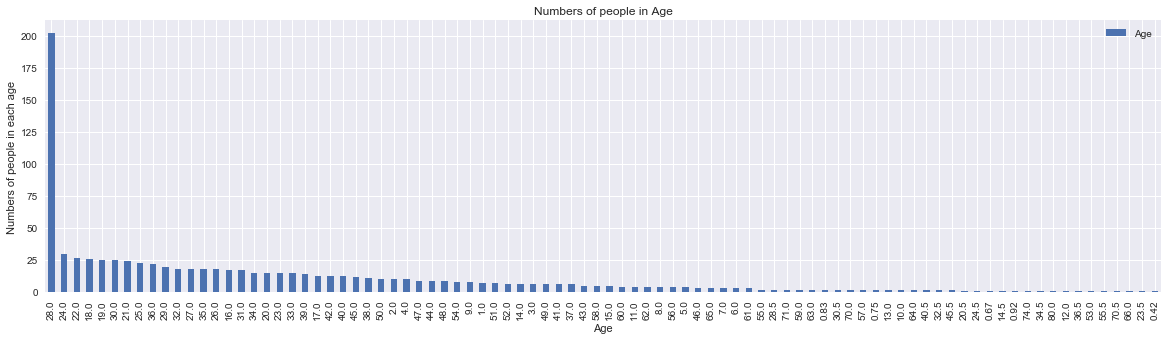

In [14]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.4 Age
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# this is a alternative way to plot
# plt.hist(data['Age'], label='Age', rwidth=0.5)
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

print(data['Age'].describe())
# set the figure size
plt.figure(figsize=(20,5))
# plot
data['Age'].value_counts().plot(kind='bar')
# letters
plt.xlabel('Age')
plt.ylabel('Numbers of people in each age')
plt.legend()
plt.title('Numbers of people in Age')

#### Have a look at the distribution of the age of the passengers, and the reason why we have so many 28 year old is we use 28 to fill the missing value.

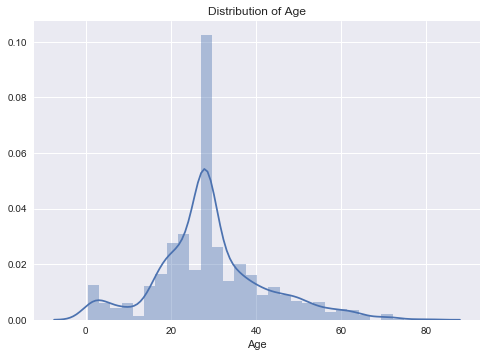

In [15]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.4 Age
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
sns.distplot(data['Age'])
plt.title('Distribution of Age')

#### Use seaborn to show the distribution of Age

In [32]:
# sns.jointplot(data['Survived'], data['Age'])

#### Use seaborn to show the distribution of Survived and Age

count         891
unique        148
top       Unknown
freq          687
Name: Cabin, dtype: object


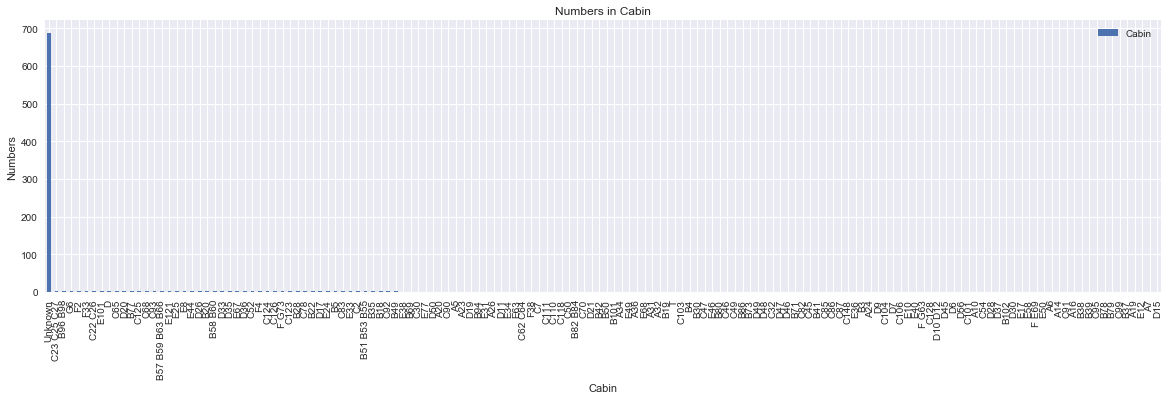

In [17]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.5 Cabin
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

print(data['Cabin'].describe())
# set the figure size
plt.figure(figsize=(20,5))
# plot
data['Cabin'].value_counts().plot(kind='bar')
# letters
plt.xlabel('Cabin')
plt.ylabel('Numbers')
plt.legend()
plt.title('Numbers in Cabin')

#### There were about 700 people that we don't know the cabin number of their room.

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object


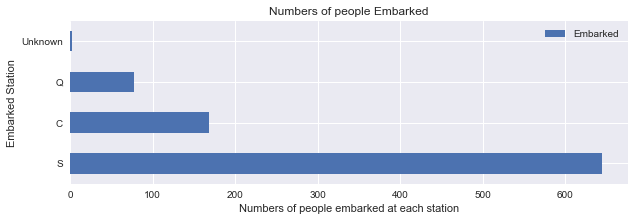

In [18]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.1.6 Embarked
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

print(data['Embarked'].describe())
# set the figure size
plt.figure(figsize=(10,3))
# plot
data['Embarked'].value_counts().plot(kind='barh')
# letters
plt.xlabel('Numbers of people embarked at each station')
plt.ylabel('Embarked Station')
plt.legend()
plt.title('Numbers of people Embarked')

#### There were over 600 people embarked at Southampton

### 3.2 Multi-variable Analysis

{1: 216, 2: 184, 3: 491}
{1: 136, 2: 87, 3: 119}


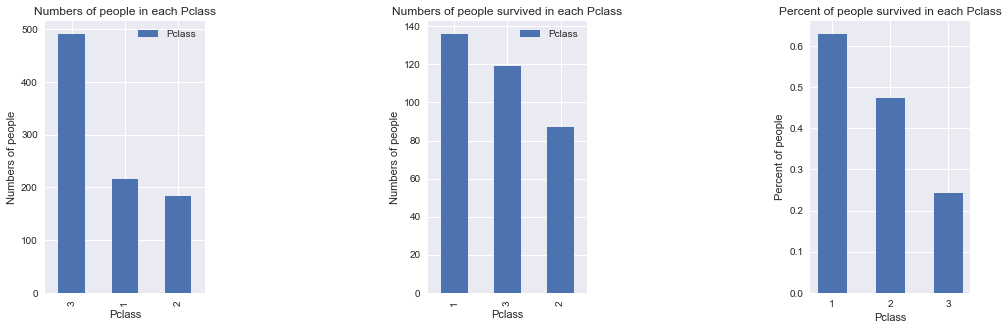

In [28]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.2.1 Survived and Pclass
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# set figure size
plt.figure(figsize=(20,5))

plt.subplot(1,6,1)
data['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Numbers of people')
plt.legend()
plt.title('Numbers of people in each Pclass')


plt.subplot(1,6,3)
data.query(''' Survived == 'Survived' ''')['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Numbers of people')
plt.legend()
plt.title('Numbers of people survived in each Pclass')

# compute the percentage of survival
nums_sur_pcls = np.array(dict(data.query(''' Survived == 'Survived' ''')['Pclass'].value_counts()).values())
nums_pcls = np.array(dict(data['Pclass'].value_counts()).values())
rate = 1.0 * nums_sur_pcls / nums_pcls
print(dict(data['Pclass'].value_counts()))
print(dict(data.query(''' Survived == 'Survived' ''')['Pclass'].value_counts()))

# plot
plt.subplot(1,6,5)
x = dict(data['Pclass'].value_counts()).keys()
plt.bar(x, list(rate), width=0.5)
plt.xlabel('Pclass')
plt.ylabel('Percent of people')
# plt.legend()
plt.title('Percent of people survived in each Pclass')

#### Q3: Compare survival chance among Pclasses?
#### A3: From the first and second figure, we can see there are about 200 people in 1st class, and survived about 140 in it.From the third figure, we can see that the percentage of survival in third class is only around 20%.
### The surviving rate in 1st class is as high as 63%. It's safe to say that it's more likely to survive in first class than other two.

{'male': 577, 'female': 314}
{'male': 109, 'female': 233}
['male', 'female']
[1, 0]


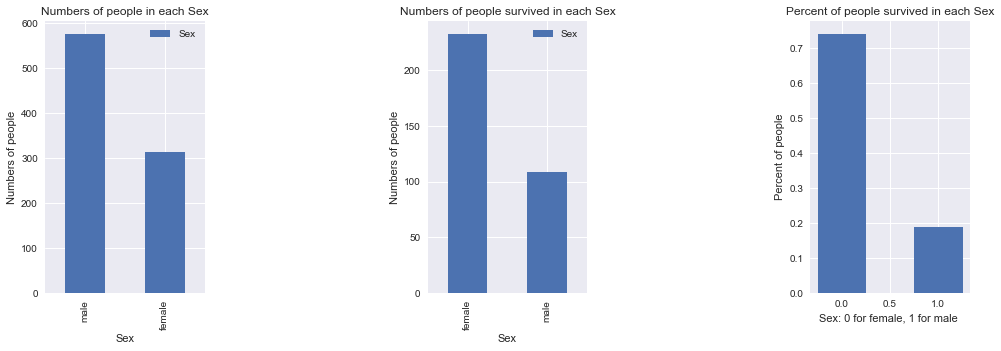

In [20]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.2.2 Survived and Sex
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# set figure size
plt.figure(figsize=(20,5))

# plot numbers of people each sex in total
plt.subplot(1,6,1)
data['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Numbers of people')
plt.legend()
plt.title('Numbers of people in each Sex')

# plot numbers of survival in each sex
plt.subplot(1,6,3)
data.query(''' Survived == 'Survived' ''')['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Numbers of people')
plt.legend()
plt.title('Numbers of people survived in each Sex')



# compute the percentage of survival
nums_sur_pcls = np.array(dict(data.query(''' Survived == 'Survived' ''')['Sex'].value_counts()).values())
nums_pcls = np.array(dict(data['Sex'].value_counts()).values())
rate = 1.0 * nums_sur_pcls / nums_pcls
print(dict(data['Sex'].value_counts()))
print(dict(data.query(''' Survived == 'Survived' ''')['Sex'].value_counts()))

plt.subplot(1,6,5)
x = dict(data['Sex'].value_counts()).keys()
print(x)
x = [1, 0]
print(x)
# don't know why plt cannot take string for x axis label
plt.bar(x, list(rate), width=0.5, )
plt.xlabel('Sex: 0 for female, 1 for male ')
plt.ylabel('Percent of people')
plt.legend()
plt.title('Percent of people survived in each Sex')



#### Q4: Compare survival chance between male and female passangers?
#### A4: The surviving rate in female is above 70%, and lower than 20% in male. Females are much more likely to survive, maybe it's because the women and children first rule.

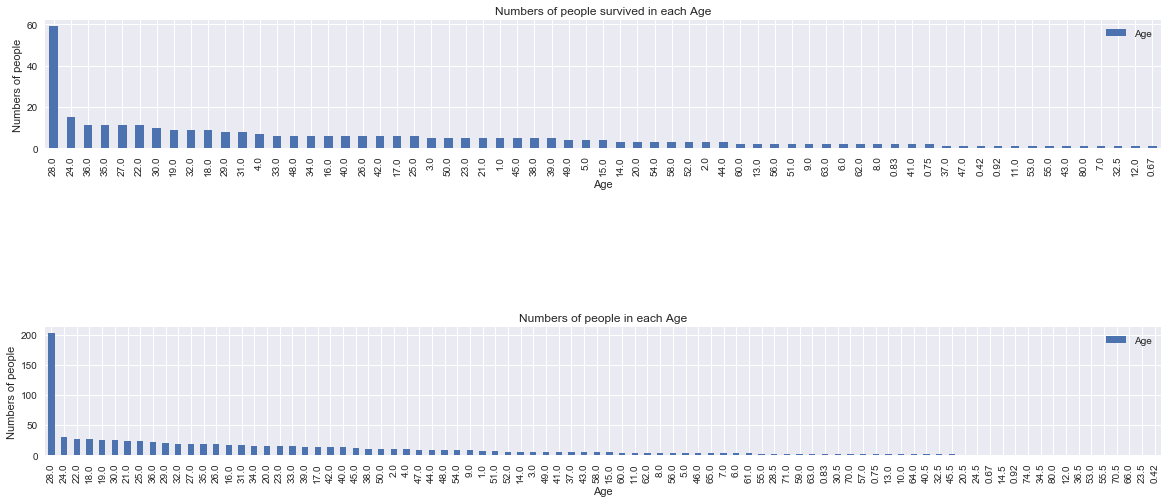

In [21]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.2.3 Survived and Age
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# set the figure size
plt.figure(figsize=(20,8))
# set subplot
plt.subplot(3,1,1)
data.query(''' Survived == 'Survived' ''')['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Numbers of people')
plt.legend()
plt.title('Numbers of people survived in each Age')


plt.subplot(3,1,3)
data['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Numbers of people')
plt.legend()
plt.title('Numbers of people in each Age')

#### 28 is the age where people survived the most, but the reason for this is we replaced null value with 28. We can roughly see that 18-40 is the age where people were more likely to survive.

female    91
male      45
Name: Sex, dtype: int64
{'male': 45, 'female': 91}
{'male': 122, 'female': 94}
{'male': 122, 'female': 94}
[1, 0]


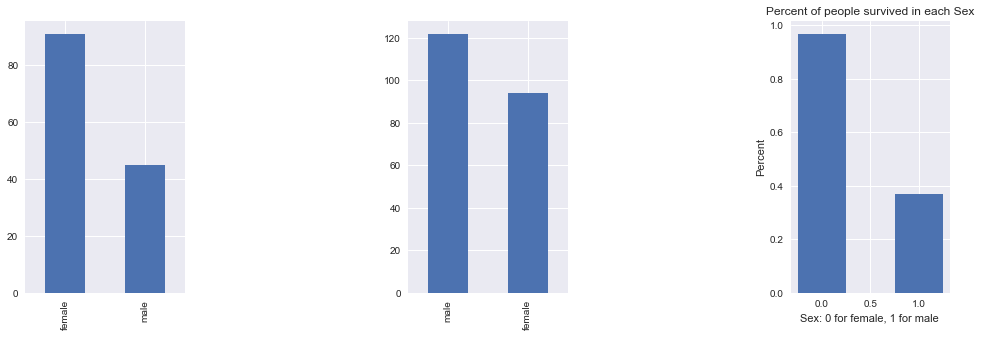

In [22]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# 3.2.4 Survived and Sex and Pclass
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.figure(figsize=(20,5))
plt.subplot(1,6,1)
data.query(''' Survived == 'Survived' and Pclass == 1''')['Sex'].value_counts().plot(kind='bar')
survived_firstclass = data.query(''' Survived == 'Survived' and Pclass == 1''')['Sex'].value_counts()
print(survived_firstclass)


plt.subplot(1,6,3)
data.query('''Pclass == 1''')['Sex'].value_counts().plot(kind='bar')


# compute the percentage of survival
nums_sur_pcls = np.array(dict(data.query(''' Survived == 'Survived' and Pclass == 1''')['Sex'].value_counts()).values())
nums_pcls = np.array(dict(data.query(''' Pclass == 1 ''')['Sex'].value_counts()).values())
rate = 1.0 * nums_sur_pcls / nums_pcls
print(dict(data.query(''' Survived == 'Survived' and Pclass == 1''')['Sex'].value_counts()))
print(dict(data.query(''' Pclass == 1 ''')['Sex'].value_counts()))

plt.subplot(1,6,5)
x = dict(data.query(''' Pclass == 1 ''')['Sex'].value_counts())
print(x)
x = [1, 0]
print(x)
# don't know why plt cannot take string for x axis label
plt.bar(x, list(rate), width=0.5, )
plt.xlabel('Sex: 0 for female, 1 for male ')
plt.ylabel('Percent')
plt.legend()
plt.title('Percent of people survived in each Sex')

#### Q5: Compare survival chance between male and female passangers in first class?
#### A5: 91 out of 94 females in first class survived. That's 96% chance of survival. And the male side is 36.88%, still higher than overall male surviving rate.

### Q6: is there a Jack or Rose in our dataset?

In [23]:
import re

In [24]:
patternJck = re.compile(r'Jack')
patternRs = re.compile(r'Rose')
for ii in range(len(data.Name)):
    matchJck = patternJck.search(data.Name[ii])
    matchRs = patternRs.search(data.Name[ii])
    if matchJck :
        print matchJck.group()
        print data.Name[ii]
    if matchRs :
        print matchRs.group()
        print data.Name[ii]

Jack
Brewe, Dr. Arthur Jackson
Rose
Aks, Mrs. Sam (Leah Rosen)


In [25]:
jack = data.query(''' Name == 'Jack'  ''')
rose = data.query(''' Name == 'Rose'  ''')
print 'rose:\t' , rose.shape[0]
print 'jack:\t' , jack.shape[0]
print 'There is no Jack and Rose. Lier'

rose:	0
jack:	0
There is no Jack and Rose. Lier


## 4. Conclusion Phase:
> <br /><font size='4'>
There were 342 people survived in total. The overall surviving rate is around 38%.
<br />There were 216 people in 1st class, 184 in 2nd class, 491 in 3rd class. The survival rate in first class is as high as 63%, second class follows, and the surviving rate in third class is only about 20%.
<br />Surviving rate for female is 74.20%, for men, this number is about 18.89%. Seems like females have much more chances to survive than males.
<br />The surviving rate of females in first class is amazing, 91 female passengers out of 94 in first class were survived. For male passengers, 36.88% of them were survived, slightly lower than overall male surviving rate.
<br />Unfortunately, there were not Jack and Rose on Titanic.
<br /><br />For the missing value, I replace them with median value in 'Age', replace null value in 'Cabin' and 'Embarked' with 'Unknown'. For me, I think median for numerical is good, and 'Unknown for categorical data is also reasonable. However, I saw someone on internet use kNearestNeighbor Imputation method to replace null value. Maybe this would be a better way to deal with missing value, a potential improvement there.
<br />In terms of computational costs, I think my implementation is not very time-consuming.
<br /><br />For limitations, I checked online that there were 2222 people on board on Titanic, including passengers and crew, we only have 891 here in this dataset. So our sample only collect 40% of the total passenger. So if our sample is not good enough, there could be many problems about our analysis. The problems could be, more weight on first class, more weight on females, more weight on survivors, more weight on crews and so on. So there could be many biases made by sampling.
<br />Furthur more, there are limitations in analysis as well, we could be missing some important informations, such as whether a person is a crew member, and the position of the crew member. I learnt from the following website that all the lookout members are survived and all the engineering members are died to make the ship float as long as possible. And the overall surviving rate among crew member is lower than the number for passengers. It's only 24%.
</font> 

http://www.titanicfacts.net/titanic-passengers.html
<br />This is where I got the numbers.